# Using Simple Linear Regression to Predict Used Car Prices

 In this analysis, we will find correlations between different variables of a used car dataset. Then we will build a model to predict price from a testing set.

### Table of Contents

* [Initialization](#initialization)
* [Finding Correlation Using Linear Regression](#correlation)
* [Analyzing Categorical Variables](#categorical)
* [Finding Correlation Using Multiple Linear Regression](#multiple-regression)
* [Building the Model](#building-the-model)
* [Evaluation](#Evaluation)

## Initialization <a name="initialization"></a>
#### Import Data and Packages

In [1]:
import types
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a4384303ae5e4ec98ee702f0d19131cf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yV9CLvBl1MndY1vPas9kHUKNhlcApL62jA19mQ7Ady68',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a4384303ae5e4ec98ee702f0d19131cf.get_object(Bucket='usedcardataset-donotdelete-pr-bcmzfe08lg8hxv',Key='datasets_750216_1305559_merc.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


## Data Overview

Here's a breakdown of the features of the dataset.

- **model** e.g. SLK
- **year** e.g. 2005
- **price** e.g. 5200
- **transmission** e.g. Automatic
- **mileage** e.g. 63000
- **fuelType** e.g Petrol
- **tax** e.g. 325
- **mpg** e.g. 32.1
- **engineSize** e.g. 1.8

#### Explore Feature Patterns

In [4]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Display a list of datatypes for each column to understand what type of variables we are dealing with.

In [5]:
print(df.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


All datatypes seem to be correctly set.

## Finding Correlation Using Linear Regression <a name="correlation"></a>

Using the df.corr() function, we can get an overview of all relationships between each column to another.
Note: Values closest to 1 or -1 represent a stronger positive or negative linear relationship. Values closest to or at zero represent no relationship at all.

In [6]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


From this table, we can conclude that year, mileage, mpg and engine size are potential predictors of price.

Let's get a closer look at these relationships.

#### Year & Price

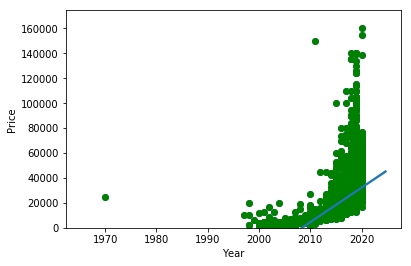

In [7]:
sns.regplot(x="year", y="price", data=df)
plt.ylim(0,)

plt.scatter(df.year, df.price, color='green')
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [8]:
df[["year", "price"]].corr()

,year,price
year,1.000000,0.520712
price,0.520712,1.000000


With reguard to the outliers, we can conclude that year and price have a strong positive linear relationship.

#### Mileage & Price

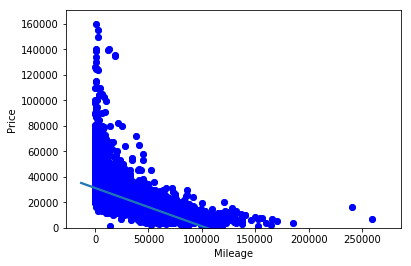

In [9]:
sns.regplot(x="mileage", y="price", data=df)
plt.ylim(0,)

plt.scatter(df.mileage, df.price, color='blue')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [10]:
df[["mileage", "price"]].corr()

,mileage,price
mileage,1.000000,-0.537214
price,-0.537214,1.000000


Mileage and price have a strong negative linear relationship. Almost exactly opposite from year and price.

#### Mpg & Price

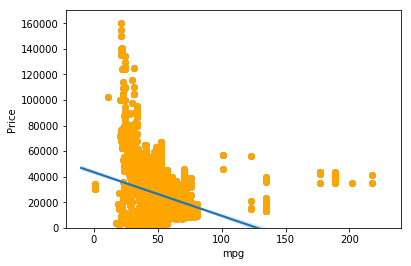

In [11]:
sns.regplot(x="mpg", y="price", data=df)
plt.ylim(0,)

plt.scatter(df.mpg, df.price, color='orange')
plt.xlabel("mpg")
plt.ylabel("Price")
plt.show()

In [12]:
df[["mpg", "price"]].corr()

,mpg,price
mpg,1.000000,-0.438445
price,-0.438445,1.000000


Again, we see a strong negitave relationship between mpg and price.

#### Engine Size & Price

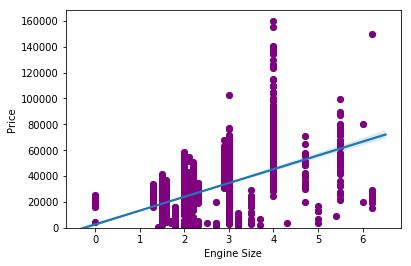

In [13]:
sns.regplot(x="engineSize", y="price", data=df)
plt.ylim(0,)

plt.scatter(df.engineSize, df.price, color='purple')
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

In [14]:
df[["engineSize", "price"]].corr()

,engineSize,price
engineSize,1.000000,0.516126
price,0.516126,1.000000


Engine size and price show the strongest positive linear relationship out of all variables.

## Analyzing Categorical Variables <a name="categorical"></a>

Two other variables that could have influence over price is transmission and fuel type. They are both object types, so we can visualize them using a box plot.

#### Transmission

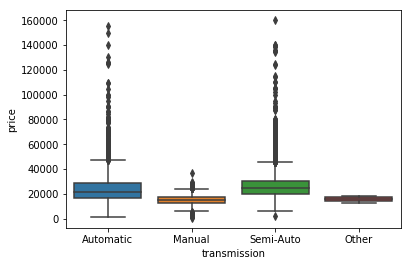

In [15]:
sns.boxplot(x="transmission", y="price", data=df)

#### Fuel Type

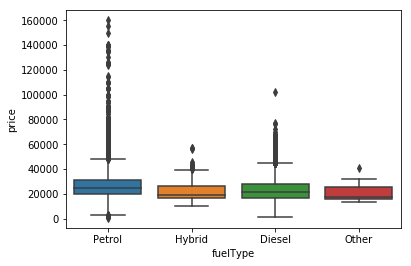

In [16]:
sns.boxplot(x="fuelType", y="price", data=df)

As a conclusion, the fuel type categories have a significant overlap, so fuel type would not be a good predictor of price. Meanwhile, the transmission categories have nicely sized gap between them which indicates that they are a good predictor of price.

Before diving into multiple linear regression, let's get an overview of basic statistics for all continuous variables. This will help us understand our data better.

In [17]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


 Note: For reference, we can also determine how much of each varible are in the dataset using value counts. 
As an example, let's take a value count of the categorical varibles we just used.


#### Transmission:

In [18]:
df['transmission'].value_counts().to_frame()

,transmission
Semi-Auto,6848
Automatic,4825
Manual,1444
Other,2


#### Fuel Type

In [19]:
df['fuelType'].value_counts().to_frame()

,fuelType
Diesel,9187
Petrol,3752
Hybrid,173
Other,7


## Finding Correlation Using Multiple Linear Regression <a name="multiple-regression"></a>

In this case, the best way to visualize these relationships is using a heat map.

We will begin with grouping.

In [20]:
df['fuelType'].unique()

array(['Petrol', 'Hybrid', 'Diesel', 'Other'], dtype=object)

These are the different categories of fuelType. In order to find which fuel type is most valuable, we will group "fuelType" and average them.

In [21]:
df_fuelType_avg = df[['fuelType', 'price']]

Calculate average...

In [22]:
df_fuelType_avg = df_fuelType_avg = df_fuelType_avg.groupby(['fuelType'], as_index=False).mean()
df_fuelType_avg

,fuelType,price
0,Diesel,23275.122673
1,Hybrid,23091.572254
2,Other,21991.285714
3,Petrol,28263.208955


In [23]:
df_group = df[['fuelType', 'transmission', 'price']]
grouped_test1 = df_group.groupby(['fuelType','transmission'],as_index=False).mean()
grouped_test1

,fuelType,transmission,price
0,Diesel,Automatic,22902.562607
1,Diesel,Manual,14139.761146
2,Diesel,Other,12995.000000
3,Diesel,Semi-Auto,25365.094395
4,Hybrid,Automatic,21260.788462
5,Hybrid,Semi-Auto,25851.014493
6,Other,Automatic,22539.833333
7,Other,Other,18700.000000
8,Petrol,Automatic,29009.083813
9,Petrol,Manual,17886.894422


We can now conclude that on average, semi-auto vehicles with fuel type 'petrol' are the most expensive.

To make this easier to read, it should be converted to a pivot table.

In [24]:
grouped_pivot = grouped_test1.pivot(index='fuelType', columns='transmission')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                     
transmission     Automatic        Manual    Other     Semi-Auto
fuelType                                                       
Diesel        22902.562607  14139.761146  12995.0  25365.094395
Hybrid        21260.788462      0.000000      0.0  25851.014493
Other         22539.833333      0.000000  18700.0      0.000000
Petrol        29009.083813  17886.894422      0.0  30378.890310

### Heatmap

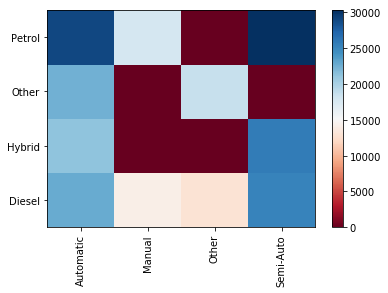

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap="RdBu")

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

This heatmap gives us an graphical representation of the pivot tables.
It reinforces our analysis that on average, vehicles with a transmission type of semi-auto and fuel type of petrol are the most expensive. Thus proving that transmission and fuel type are good predictors of price.

## Building the Model: Multiple Linear Regression

Since there are muliple predictors for price, we will use multiple linear regression. Features we will be working with now from on in this notebook include year, mileage, mpg and engineSize.

We will start by creating a new dataframe with just these features.

In [51]:
pred_df = df[['year', 'mileage', 'mpg', 'engineSize', 'price']]
pred_df.head()

,year,mileage,mpg,engineSize,price
0,2005,63000,32.1,1.8,5200
1,2017,27000,61.4,2.1,34948
2,2016,6200,28.0,5.5,49948
3,2016,16000,30.4,4.0,61948
4,2016,4000,30.1,4.0,73948


Now, we create the train and test dataset.

This helps us provide a more accurate evaluation on out-of-sample accuracy since the testing dataset is not part of the dataset that have been used to train the data.

Therefore, the model has no knowledge of the outcome of these data points, so it is truly 'out-of-sample' testing.

In [52]:
msk = np.random.rand(len(df)) < 8.0
train = pred_df[msk]
test = pred_df[~msk]

Train data distribution...

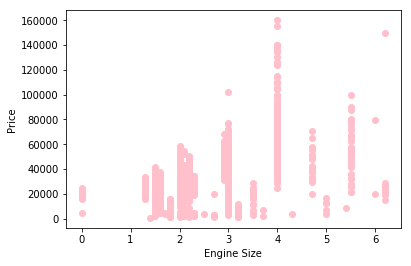

In [63]:
plt.scatter(train.engineSize, train.price, color='pink')
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

Building the model...

In [53]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['year', 'mileage', 'mpg', 'engineSize']])
y = np.asanyarray(train[['price']])
regr.fit (x, y)
# Coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [[ 2.15317380e+03 -1.32887036e-01 -1.33606234e+02  1.09729996e+04]]


The method of predicition for this model is Ordinary Least Squares (OLS). OLS is used to estimate the unknown parameters in a linear regression model. It does this by mimimizing the sum of squared errors (SSE) or mean squared error (MSE) between the targte variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

### Prediciton

In [58]:
y_hat = regr.predict(test[['year', 'mileage', 'mpg', 'engineSize']])
x = np.asanyarray(test[['year', 'mileage', 'mpg', 'engineSize']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Variance score where 1 is a perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required.

In [45]:
ensure_min_features.shape

NameError: name 'ensure_min_features' is not defined